# Hierarchical Indices and pandas DataFrames

## Reference:
* https://www.datacamp.com/tutorial/pandas-multi-index
* https://www.datacamp.com/courses/data-manipulation-with-pandas


# What is the Index of a DataFrame?

In [1]:
# Import pandas
import pandas as pd

# Load in data
df = pd.read_csv('datasets/user_ex_python.csv')
df

,date,language,ex_complete
0,2017-01-01,python,6
1,2017-01-02,python,5
2,2017-01-03,python,10


In [2]:
# Check out index
df.index

RangeIndex(start=0, stop=3, step=1)

In [5]:
# We can use this index to slice out a row or rows 
# Slice and dice data
df.loc[:1]

,date,language,ex_complete
0,2017-01-01,python,6
1,2017-01-02,python,5


In [6]:
# Set new index
df.set_index(pd.DatetimeIndex(df['date']), inplace=True)
df
# note the new index (date)

,date,language,ex_complete
date,,,
2017-01-01,2017-01-01,python,6
2017-01-02,2017-01-02,python,5
2017-01-03,2017-01-03,python,10


In [7]:
# Check out new index
df.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03'], dtype='datetime64[ns]', name='date', freq=None)

In [8]:
# Now you can slice out rows using the DateTimeIndex
# Slice and dice data w/ new index
df.loc['2017-01-02']

date           2017-01-02
language           python
ex_complete             5
Name: 2017-01-02 00:00:00, dtype: object

# The Multi-index of a pandas DataFrame

In [15]:
# Import and check out data
df = pd.read_csv('datasets/user_ex.csv')
df

,date,language,ex_complete
0,2017-01-01,python,6
1,2017-01-02,python,5
2,2017-01-03,python,10
3,2017-01-01,r,8
4,2017-01-02,r,8
5,2017-01-03,r,8


In [16]:
# Set index
df.set_index(['date', 'language'], inplace=True)
df

,,ex_complete
date,language,
2017-01-01,python,6
2017-01-02,python,5
2017-01-03,python,10
2017-01-01,r,8
2017-01-02,r,8
2017-01-03,r,8


In [17]:
# Check out multi-index
df.index

MultiIndex([('2017-01-01', 'python'),
            ('2017-01-02', 'python'),
            ('2017-01-03', 'python'),
            ('2017-01-01',      'r'),
            ('2017-01-02',      'r'),
            ('2017-01-03',      'r')],
           names=['date', 'language'])

In [18]:
# To be able to slice with a multi-index, you need to sort the index first:
# Sort index
df.sort_index(inplace=True)
df

ex_complete
date       language             
2017-01-01 python              6
           r                   8
2017-01-02 python              5
           r                   8
2017-01-03 python             10
           r                   8

In [19]:
# Now you can slice out the number of R exercises completed on 2017-01-02 by passing a tuple to the .loc accessor:
# Slice & dice your DataFrame
df.loc[('2017-01-02', 'r')]

ex_complete    8
Name: (2017-01-02, r), dtype: int64

# Hierarchical Indices, groupby Objects and Split-Apply-Combine

In [30]:
# Import and check out data
import seaborn as sns
tips = sns.load_dataset("tips")
# tips.head()
# tips.describe()
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [21]:
tips.index

RangeIndex(start=0, stop=244, step=1)

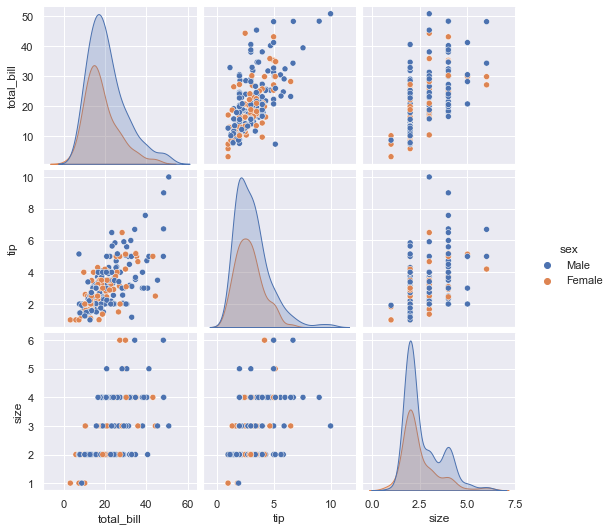

In [28]:
# do some visual EDA 
# Import pyplot, figures inline, set style, plot pairplot
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.pairplot(tips, hue='sex');

In [33]:
# If you want the average tip difference between 'smokers' and 'non-smokers', split the original DataFrame by the 'smoker'
# Get mean of smoker/non-smoker groups
df = tips.groupby('smoker').mean()
df

,total_bill,tip,size
smoker,,,
Yes,20.756344,3.008710,2.408602
No,19.188278,2.991854,2.668874


In [34]:
# Check out new index
df.index

CategoricalIndex(['Yes', 'No'], categories=['Yes', 'No'], ordered=False, dtype='category', name='smoker')

In [36]:
# If desired, you can reset the index so that 'smoker' becomes a column of the DataFrame:
# Reset the index
df.reset_index()

,smoker,total_bill,tip,size
0,Yes,20.756344,3.008710,2.408602
1,No,19.188278,2.991854,2.668874


# Now it's time to find out how hierarchical indices arise from split-apply-combine and groupby operations.

In [38]:
# group a dataset according to two features
# To do this, pass the column names you wish to group by as a list:
# Group by two columns
df = tips.groupby(['smoker','time']).mean()
df

total_bill       tip      size
smoker time                                  
Yes    Lunch    17.399130  2.834348  2.217391
       Dinner   21.859429  3.066000  2.471429
No     Lunch    17.050889  2.673778  2.511111
       Dinner   20.095660  3.126887  2.735849

In [39]:
# Check out index
df.index

MultiIndex([('Yes',  'Lunch'),
            ('Yes', 'Dinner'),
            ( 'No',  'Lunch'),
            ( 'No', 'Dinner')],
           names=['smoker', 'time'])

In [40]:
# You can do a bunch of useful things such as getting the counts in each grouping
# Group by two features
tips.groupby(['smoker','time']).size()

smoker  time  
Yes     Lunch      23
        Dinner     70
No      Lunch      45
        Dinner    106
dtype: int64

In [41]:
# swap the levels of the hierarchical index also so that 'time' occurs before 'smoker in the index
# Swap levels of multi-index
df.swaplevel()

,,total_bill,tip,size
time,smoker,,,
Lunch,Yes,17.399130,2.834348,2.217391
Dinner,Yes,21.859429,3.066000,2.471429
Lunch,No,17.050889,2.673778,2.511111
Dinner,No,20.095660,3.126887,2.735849


In [43]:
# remove one of these features from the hierarchical index and form different columns with respect to that feature
# Unstack your multi-index
df.unstack()

total_bill                  tip                size          
time        Lunch     Dinner     Lunch    Dinner     Lunch    Dinner
smoker                                                              
Yes     17.399130  21.859429  2.834348  3.066000  2.217391  2.471429
No      17.050889  20.095660  2.673778  3.126887  2.511111  2.735849

In [44]:
# unstack on the outer feature of the index using the keyword argument 'level':
# Unsstack the outer index
df.unstack(level=0)

total_bill                  tip                size          
smoker        Yes         No       Yes        No       Yes        No
time                                                                
Lunch   17.399130  17.050889  2.834348  2.673778  2.217391  2.511111
Dinner  21.859429  20.095660  3.066000  3.126887  2.471429  2.735849

In [71]:
# Import data and check out head of DataFrame
# data from https://data.world/chasewillden/netflix-shows
df = pd.read_csv('datasets/netflix.csv')
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [72]:
# the f*cking "basic indexing" is a disaster because it refers to colums.  Waste of time!!!
# the f*cking ".loc" function is a disaster because it does not scale to multi-index.  Waste of time!!!
# the f*cking "attribute access" is just an alltogether disaster

# basic indexing...
# df[2] # does not work - "basic indexing" means columns
# df['title']) # works but generally not useful by itself - it returns a Series
# df[['title', 'rating']] # marginally useful - it returns a Dataframe

# .loc
# type(df.loc[2]) # works but generally not useful (does not scale) because it returns a single row - a pd.Series

# "attribute" - I mean who thinks up this shit - useless!!!
# df.title # works but the attribute name is hard-coded - cannot use a variable to indirect.  Stupid!!!!


# .info(), pairplot, describe(), head()
* nulls count

In [108]:
#print(type(df.info())) # returns nothing - prints to stdout... <yuk!>
print(type(df.describe())) # returns DataFrame
print(type(df.dropna())) # returns DataFrame
print(type(df.drop_duplicates())) # returns DataFrame
print(type(df.index)) # returns pandas.core.indexes.numeric.Int64Index'

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.indexes.numeric.Int64Index'>


In [96]:
y = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   ratingDescription  1000 non-null   int64  
 4   release year       1000 non-null   int64  
 5   user rating score  605 non-null    float64
 6   user rating size   1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [97]:
df.describe()

,ratingDescription,release year,user rating score,user rating size
count,1000.00000,1000.000000,605.000000,1000.000000
mean,67.36600,2010.335000,84.094215,80.783000
std,30.78561,8.877927,12.344371,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,75.000000,80.000000
50%,60.00000,2015.000000,88.000000,80.000000
75%,90.00000,2016.000000,95.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000


# Drop rows with missing values and drop duplicate
* df.dropna(inplace=True)
* df.drop_duplicates(inplace=True)

In [98]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 979
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              246 non-null    object 
 1   rating             246 non-null    object 
 2   ratingLevel        246 non-null    object 
 3   ratingDescription  246 non-null    int64  
 4   release year       246 non-null    int64  
 5   user rating score  246 non-null    float64
 6   user rating size   246 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 15.4+ KB


# Visualize pairplot of df
* sns.pairplot(df, hue='rating');

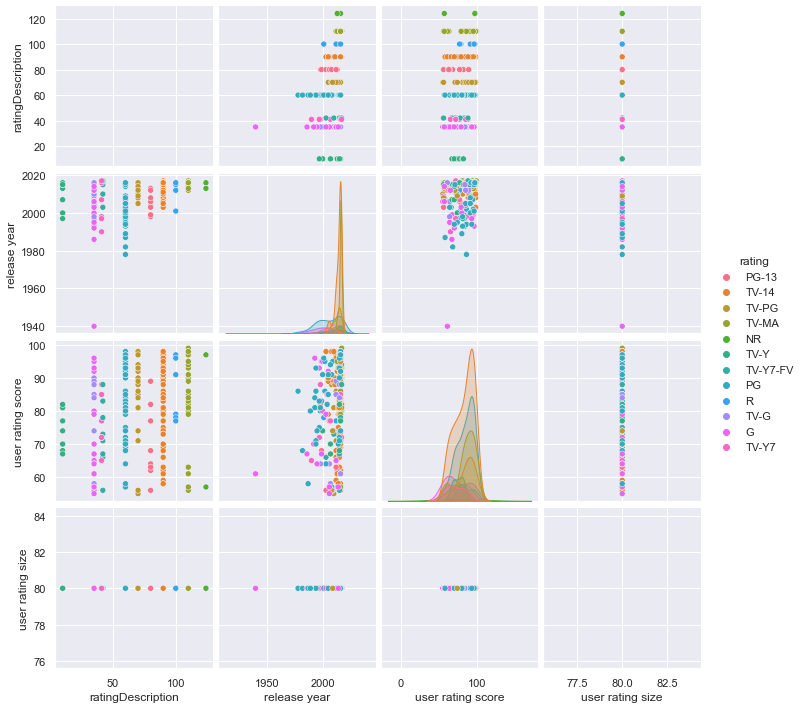

In [100]:
# Visualize pairplot of df
sns.pairplot(df, hue='rating');

# Groupbys and split-apply-combine to answer the question

In [127]:
print(type(df.groupby('release year'))) # returns DataFrameGroupBy

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [128]:
# Group by year
df_by_year = df.groupby('release year')

In [130]:
print(df_by_year)

In [126]:
type(df_by_year.head()) ### fucking A

pandas.core.frame.DataFrame

In [125]:
# ...given an instance of "DataFrameGroupBy" class...
# df_by_year.info() # NO!!!
print(type(df_by_year.describe())) # returns DataFrame
print(type(df_by_year.head())) # returns DataFrame
# print(type(df_by_year.index)) # --NO-- !!! a DataFrameGroupBy does not have an index attribute !!!
print(type(df_by_year.median())) # reductions on a GroupBy instance... returns a DataFrame - one row per group
print(type(df_by_year.median().index)) # --YES-- reduction on GroupBy is DataFrame.  Index is the value of the group...
df_by_year.median().index

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.indexes.numeric.Int64Index'>


Int64Index([1940, 1978, 1982, 1986, 1987, 1989, 1990, 1992, 1993, 1994, 1995,
            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='release year')

## Apply

In [113]:
# Summary stats over years
# df_by_year.describe().head()
df_by_year.describe().tail()

ratingDescription                                           \
                         count       mean        std   min   25%    50%   
release year                                                              
2013                      11.0  88.545455  29.039159  10.0  90.0   90.0   
2014                      12.0  79.583333  21.368874  35.0  70.0   80.0   
2015                      32.0  73.250000  27.344870  10.0  60.0   80.0   
2016                      82.0  84.341463  23.018629  10.0  70.0   90.0   
2017                      10.0  94.300000  28.519194  41.0  95.0  110.0   

                           user rating score             ...               \
                75%    max             count       mean  ...    75%   max   
release year                                             ...                
2013          100.0  124.0              11.0  76.909091  ...  88.50  97.0   
2014           90.0  110.0              12.0  74.916667  ...  84.00  94.0   
2015           90.0  110.0              32.0  82.750000  ...  93.25  98.0   
2016          100.0  124.0              82.0  85.060976  ...  95.00  98.0   
2017          110.0  110.0              10.0  87.000000  ...  92.50  99.0   

             user rating size                                           
                        count  mean  std   min   25%   50%   75%   max  
release year                                                            
2013                     11.0  80.0  0.0  80.0  80.0  80.0  80.0  80.0  
2014                     12.0  80.0  0.0  80.0  80.0  80.0  80.0  80.0  
2015                     32.0  80.0  0.0  80.0  80.0  80.0  80.0  80.0  
2016                     82.0  80.0  0.0  80.0  80.0  80.0  80.0  80.0  
2017                     10.0  80.0  0.0  80.0  80.0  80.0  80.0  80.0  

[5 rows x 24 columns]

In [114]:
# see what the grouping looks like, you can pass the groupby object to the function list()
# Cast grouping as a list and check out one year
list(df_by_year)[-1]

(2017,
                          title    rating  \
 7          The Vampire Diaries     TV-14   
 36          Santa Clarita Diet     TV-MA   
 41              13 Reasons Why     TV-MA   
 78           Grace and Frankie     TV-MA   
 80                The Get Down     TV-MA   
 97                 Chewing Gum     TV-MA   
 148             Dave Chappelle     TV-MA   
 223                     Sense8     TV-MA   
 626  Dragons: Race to the Edge  TV-Y7-FV   
 630         Dawn of the Croods     TV-Y7   
 
                                            ratingLevel  ratingDescription  \
 7    Parents strongly cautioned. May be unsuitable ...                 90   
 36   For mature audiences.  May not be suitable for...                110   
 41   For mature audiences.  May not be suitable for...                110   
 78   For mature audiences.  May not be suitable for...                110   
 80   For mature audiences.  May not be suitable for...                110   
 97   For mature audiences. 

# Combine
Let's say that you wanted the mean or median user_rating_score for each year. Then you can apply the .mean() or .median() method, respectively, to the groupby object and 'combine' these into a new DataFrame.


In [115]:
# Get median values by year and print first 5 rows
df_med_by_year = df_by_year.median()
df_med_by_year.head()

,ratingDescription,user rating score,user rating size
release year,,,
1940,35.0,61.0,80.0
1978,60.0,86.0,80.0
1982,60.0,68.0,80.0
1986,35.0,67.0,80.0
1987,60.0,58.0,80.0


In [60]:
# Recall that the index of a DataFrame consists of the row labels
print(df.index)
# This index consists of the original row numbers, labelled by integers. '1' is missing as you dropped some rows above. 
#
# The index of df_med_by_year consists of the values in the original column that you grouped by, the years from release_year:
print(df_med_by_year.index) 

Int64Index([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            908, 911, 917, 931, 962, 966, 967, 972, 973, 979],
           dtype='int64', length=246)
Int64Index([1940, 1978, 1982, 1986, 1987, 1989, 1990, 1992, 1993, 1994, 1995,
            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='release year')


Text(0, 0.5, 'median rating')

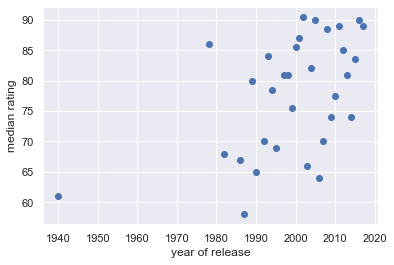

In [63]:
# You're interested in the user_rating_score column, which contains the median rating for each year.
# You can slice out the user_rating_score column of df_med_by_year and plot it as a function of the
# year (given by the index of the DataFrame df_rat_by_year):
df_rat_by_year = df_med_by_year['user rating score']
plt.scatter(df_rat_by_year.index, df_rat_by_year)
plt.xlabel('year of release')
plt.ylabel('median rating')